In [67]:
import numpy as np
import pandas as pd
from random import seed
from keras import models
from keras import Sequential
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from keras.utils import to_categorical
from tensorflow.random import set_seed
from keras.optimizers import Adam, SGD
from keras.callbacks import ModelCheckpoint
from keras.layers import Dense, Dropout, LSTM
from sklearn.preprocessing import StandardScaler, Normalizer

In [68]:
df = pd.read_csv('dataset_klines.csv')

In [69]:
df.set_index('time')

,open,high,low,close
time,,,,
2023-04-17 22:24:00,2076.21,2076.78,2076.20,2076.77
2023-04-17 22:25:00,2076.78,2076.78,2076.77,2076.78
2023-04-17 22:26:00,2076.78,2079.58,2076.77,2079.54
2023-04-17 22:27:00,2079.54,2080.83,2079.54,2080.40
2023-04-17 22:28:00,2080.39,2080.71,2079.99,2080.00
...,...,...,...,...
2023-04-18 06:39:00,2101.96,2103.49,2101.95,2103.03
2023-04-18 06:40:00,2103.04,2103.04,2102.19,2102.39
2023-04-18 06:41:00,2102.40,2102.40,2101.34,2101.38


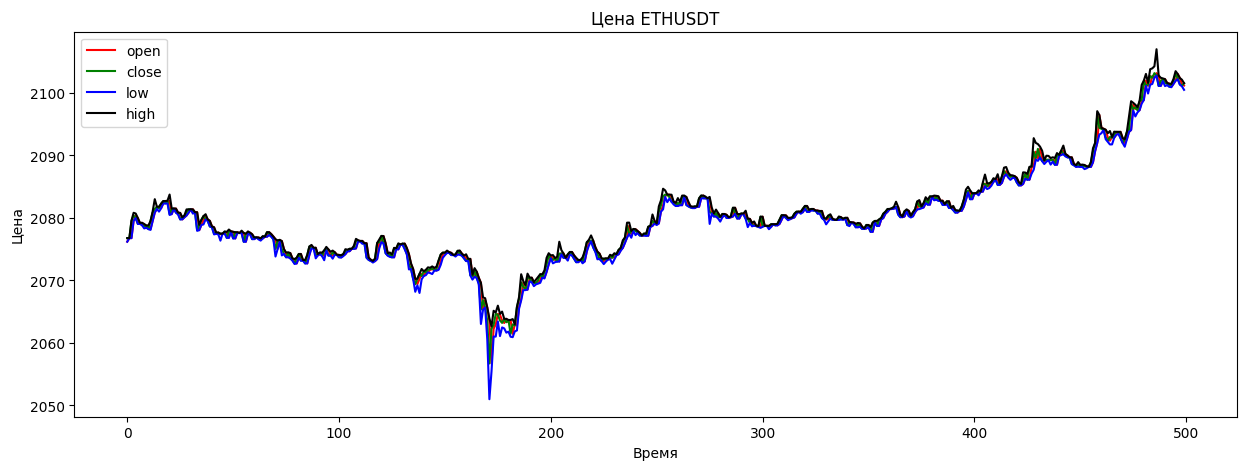

In [70]:
plt.figure(figsize=(15, 5));
plt.plot(df.open.values, color='red', label='open')
plt.plot(df.close.values, color='green', label='close')
plt.plot(df.low.values, color='blue', label='low')
plt.plot(df.high.values, color='black', label='high')
plt.title('Цена ETHUSDT')
plt.xlabel('Время')
plt.ylabel('Цена')
plt.legend(loc='best')
plt.show()

In [71]:
scaler = StandardScaler()
open = df[['open']].values
high = df[['high']].values
low = df[['low']].values
close = df[['close']].values

scaler = scaler.fit(open+high+low+close)

df['open'] = scaler.transform(open)
df['high'] = scaler.transform(open)
df['low'] = scaler.transform(open)
df['close'] = scaler.transform(open)

In [72]:
df.set_index('time',inplace=True)
df

,open,high,low,close
time,,,,
2023-04-17 22:24:00,-199.369708,-199.369708,-199.369708,-199.369708
2023-04-17 22:25:00,-199.351507,-199.351507,-199.351507,-199.351507
2023-04-17 22:26:00,-199.351507,-199.351507,-199.351507,-199.351507
2023-04-17 22:27:00,-199.263376,-199.263376,-199.263376,-199.263376
2023-04-17 22:28:00,-199.236234,-199.236234,-199.236234,-199.236234
...,...,...,...,...
2023-04-18 06:39:00,-198.547467,-198.547467,-198.547467,-198.547467
2023-04-18 06:40:00,-198.512981,-198.512981,-198.512981,-198.512981
2023-04-18 06:41:00,-198.533417,-198.533417,-198.533417,-198.533417


In [73]:
data = df[['open','high','low']]
target = df['close']

In [74]:
x = []
y = []
timesteps = 10
for i in range(timesteps, len(data)):
# Кодирование даты
  x.append(np.array(data[i-timesteps:i]))
  y.append(target[i])
x, y = np.array(x), np.array(y)

In [75]:
split = len(data)*85//100
x_train, x_test = x[:split], x[split:]
y_train, y_test = y[:split], y[split:]

In [76]:
model = Sequential()
model.add(LSTM(64, input_shape=(x_train.shape[1], x_train.shape[-1]), return_sequences=True))
model.add(Dropout(0.15))
model.add(LSTM(units = 32))
model.add(Dropout(0.15))
model.add(Dense(units = 1))

In [77]:
model.compile(loss = 'mae', optimizer = Adam(learning_rate=0.01),metrics = ['mse'])

In [78]:
history = model.fit(x_train, y_train, epochs=100, batch_size=32,validation_split=0.1, verbose=2)

Epoch 1/100
12/12 - 4s - loss: 194.4260 - mse: 37807.7148 - val_loss: 190.2931 - val_mse: 36211.4609 - 4s/epoch - 326ms/step
Epoch 2/100
12/12 - 0s - loss: 188.5209 - mse: 35542.6797 - val_loss: 185.7889 - val_mse: 34517.5156 - 132ms/epoch - 11ms/step
Epoch 3/100
12/12 - 0s - loss: 184.2098 - mse: 33936.0156 - val_loss: 181.5095 - val_mse: 32945.7070 - 125ms/epoch - 10ms/step
Epoch 4/100
12/12 - 0s - loss: 179.8906 - mse: 32364.0742 - val_loss: 177.2731 - val_mse: 31425.7617 - 123ms/epoch - 10ms/step
Epoch 5/100
12/12 - 0s - loss: 175.6327 - mse: 30851.3613 - val_loss: 173.0847 - val_mse: 29958.3047 - 124ms/epoch - 10ms/step
Epoch 6/100
12/12 - 0s - loss: 171.3790 - mse: 29375.7988 - val_loss: 168.9310 - val_mse: 28537.6719 - 121ms/epoch - 10ms/step
Epoch 7/100
12/12 - 0s - loss: 167.0678 - mse: 27919.3008 - val_loss: 164.8022 - val_mse: 27159.7734 - 122ms/epoch - 10ms/step
Epoch 8/100
12/12 - 0s - loss: 163.2536 - mse: 26659.6680 - val_loss: 160.7003 - val_mse: 25824.6074 - 121ms/epoc

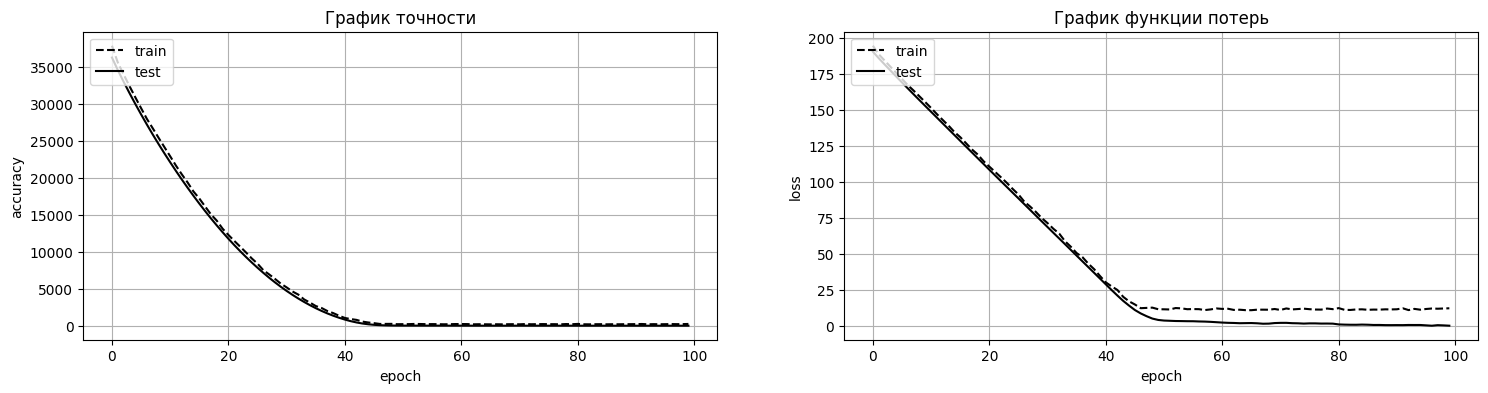

In [79]:
fig = plt.figure(figsize=(18, 4))

ax = fig.add_subplot(121)
ax.plot(history.history['mse'],'--',color='black')
ax.plot(history.history['val_mse'],color='black')
ax.set_title('График точности')
ax.set_ylabel('accuracy')
ax.set_xlabel('epoch')
ax.legend(['train', 'test'], loc='upper left')
ax.grid(True)
ax2 = fig.add_subplot(122)
ax2.plot(history.history['loss'],'--',color='black')
ax2.plot(history.history['val_loss'],color='black')
ax2.set_title('График функции потерь')
ax2.set_ylabel('loss')
ax2.set_xlabel('epoch')
ax2.legend(['train', 'test'], loc='upper left')
ax2.grid(True)
plt.show()


In [93]:
test = pd.DataFrame()

y_test_pred = list(model.predict(x_test))
y_train_pred = (model.predict(x_train))
#test['y_train_pred'] = (y_train_pred)
#test['test_y_real'] = (y_test)
test['y_test_pred'] = (y_test_pred)
test['y_test_real'] = (y_test)
test['отклонение'] = (test['y_test_pred'] - test['y_test_real'])
test['%'] = abs(test['отклонение']/test['y_test_real'])*100
test['y_test_pred'] = test['y_test_pred'].str.get(0)
test['отклонение'] = test['отклонение'].str.get(0)
test['%'] = test['%'].str.get(0)

test

14/14 [==============================] - 0s 3ms/step


,y_test_pred,y_test_real,отклонение,%
0,-199.150742,-198.951084,-0.199661,0.100357
1,-199.150742,-198.951722,-0.199020,0.100035
2,-199.150742,-198.953638,-0.197098,0.099067
3,-199.150742,-198.951722,-0.199020,0.100035
4,-199.150742,-198.976948,-0.173798,0.087346
...,...,...,...,...
60,-199.150742,-198.547467,-0.603271,0.303842
61,-199.150742,-198.512981,-0.637756,0.321267
62,-199.150742,-198.533417,-0.617325,0.310943
63,-199.150742,-198.565988,-0.584747,0.294485


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

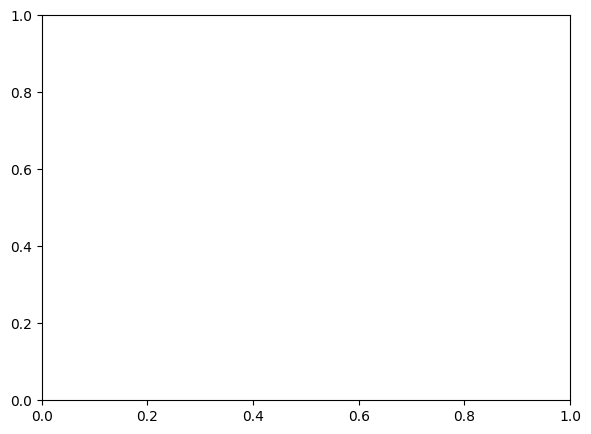

In [94]:
ft = 0 # 0 = open, 1 = close, 2 = highest, 3 = lowest

## show predictions
plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)

plt.plot(np.arange(y_train.shape[0]), y_train[:,ft], color='blue', label='train target')



plt.plot(np.arange(y_train_pred.shape[0]),y_train_pred[:,ft], color='red',
         label='train prediction')


plt.title('past and future stock prices')
plt.xlabel('time [days]')
plt.ylabel('normalized price')
plt.legend(loc='best')

plt.subplot(1,2,2)

plt.plot(np.arange(y_train.shape[0], y_train.shape[0]+y_test.shape[0]),
         y_test[:,ft], color='black', label='test target')

plt.plot(np.arange(y_train_pred.shape[0], y_train_pred.shape[0]+y_test_pred.shape[0]),
         y_test_pred[:,ft], color='green', label='test prediction')

plt.title('future stock prices')
plt.xlabel('time [days]')
plt.ylabel('normalized price')
plt.legend(loc='best')

corr_price_development_train = np.sum(np.equal(np.sign(y_train[:,1]-y_train[:,0]),
            np.sign(y_train_pred[:,1]-y_train_pred[:,0])).astype(int)) / y_train.shape[0]

corr_price_development_test = np.sum(np.equal(np.sign(y_test[:,1]-y_test[:,0]),
            np.sign(y_test_pred[:,1]-y_test_pred[:,0])).astype(int)) / y_test.shape[0]

print('correct sign prediction for close - open price for train/valid/test: %.2f/%.2f/%.2f'%(
    corr_price_development_train, corr_price_development_test))